<a href="https://colab.research.google.com/github/phytometrics/plant_phenotyping_python/blob/dev/notebooks/SLEAP_plant_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SLEAPを利用したキーポイント検出とトラッキングによる植物動態解析
![head_image](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8858456/bin/13007_2022_851_Fig2_HTML.jpg)
Gall et al., 2022より転載

## ライセンス
- Gall, G. E. C., Pereira, T. D., Jordan, A., & Meroz, Y. (2022). Fast estimation of plant growth dynamics using deep neural networks. Plant Methods, 18(1), 21. https://doi.org/10.1186/s13007-022-00851-9
    - CC-BY-4.0
- Pereira, T. D., Tabris, N., Matsliah, A., Turner, D. M., Li, J., Ravindranath, S., Papadoyannis, E. S., Normand, E., Deutsch, D. S., Wang, Z. Y., McKenzie-Smith, G. C., Mitelut, C. C., Castro, M. D., D’Uva, J., Kislin, M., Sanes, D. H., Kocher, S. D., Wang, S. S.-H., Falkner, A. L., … Murthy, M. (2022). SLEAP: A deep learning system for multi-animal pose tracking. Nature Methods, 19(4), 486–495. https://doi.org/10.1038/s41592-022-01426-1
    - CC-BY-4.0
- 本ノートブック
    - CC-BY-NC-4.0

## 解説
微小管の位置や菌糸、花粉管の先端など、さまざまな画像特徴量を設計・使用して動画データから座標を抽出し、動態解析を行うことが行われてきました。同時に、動物の個体のパーツを検出し、その動きを解析する研究も進行中であり、ここでの課題は、染色試薬や蛍光タンパク質を使用せずに自然な状態での「マーカーフリー」検出を実現することです。この分野では、深層学習によるキーポイント検出の重要性が急速に高まっています。

このような背景のもと、SLEAP（Social LEAP Estimates Animal Poses）というフレームワークが開発されました。SLEAPは、複数の動物の姿勢を同時に追跡するための深層学習システムであり、データラベリング、モデル訓練、評価のための汎用的なワークフローを提供しています。SLEAPはもともとハエやラットなど動物の行動を定量的に解析するために開発されましたが、Gallら（2022）は、「光・重力屈性」「ツルの支柱への巻き付きの動き」「避陰反応」など、植物の生理応答にも使用できることを報告しました。


### SLEAPフレームワークとは
例えば数百フレームからなる植物の時系列成長を収めた動画があるとします。そのうちの少数のフレームをサンプリングし、葉の先端や葉柄の特定地点などに手動でマーカーを配置します。それらの情報を使い、SLEAPはマーカー検出（キーポイントやキーポイント同士の接続情報）を行うモデルを訓練します。そのモデルを基軸として、SLEAPは動画全体からそれぞれのマーカーの動態を解析するパイプラインを構築・提供します。**他の深層学習モデルと異なり、訓練したモデルは解析対象の動画のみに適用され、類似の題材であっても他の動画に利用することは基本的にできないことに注意が必要です。**

### SLEAPモデル
SLEAPではいくつかのモデルが提供されており、設定ファイルを通じて柔軟な解析が可能です。設定可能なパラメーターのちの１つを紹介します。キーポイント検出にはトップダウンとボトムアップがあります。トップダウンは個体を識別したのち、その個体のキーポイントを検出する手法であり、ボトムアップは個体を識別せず、全体のキーポイントを検出したのち、どの個体に属するかを推定します。SLEAPでは、これらの手法のうち、解析対象の動画にあわせて選択することができます。今回扱う植物の題材ではボトムアップが適していたと報告されています。

- トップダウン
![topdown](https://sleap.ai/_images/topdown_approach.jpg)
- ボトムアップ
![botomup](https://sleap.ai/_images/bottomup_approach.jpg)


https://sleap.ai/tutorials/initial-training.html　より転載

### 備考
SLEAPはGUIを提供しており、ユーザーが簡単に自身のPCでサンプリングした画像に対して手動でマーカー追加をしたり、訓練・評価することが可能となっています。ただし全てのユーザーが自身のPCでGPUを利用した訓練を行えるわけではありません。その場合は手動でのラベリングまで行い、生成したslpファイルをcolaboratoryに持ち込んで訓練を行うと良いでしょう。

## 環境設定

## 環境構築
conda環境で実行する。

condacolabインストール後、mambaforgeのみインストール（anacondaのデフォルトチャンネルは一部有料ライセンスなので、可能な限りそれを使わないように考慮しています）

今回用いるSLEAPv1.4.1はtensorflowv2.6を用います。tensorflowv2.6~2.8.xを用いる場合は、CUDA11.3とCUDNNv8.2が必要なので、それを含むCondq環境を構築します。

In [1]:
%cd /content

/content


In [2]:
!pip install -q condacolab

import sys
sys.path.append("/usr/local/lib/python3.12/site-packages")

import condacolab
condacolab.install_miniforge()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...


In [3]:
!conda update -y -q -n base conda
!conda config --show-sources

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    openssl-3.4.1              |       h7b32b05_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

  ca-certificates                     2024.12.14-hbcca054_0 --> 2025.1.31-hbcca054_0 
  certifi                           2024.12.14-pyhd8ed1ab_0 --> 2025.1.31-pyhd8ed1ab_0 
  conda           

In [1]:
#https://sleap.ai/installation.html#gpu-support
!conda create -q -y --name sleap pip python=3.7.12 cudatoolkit=11.3 cudnn=8.2 -c conda-forge -c nvidia

Channels:
 - conda-forge
 - nvidia
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/sleap

  added / updated specs:
    - cudatoolkit=11.3
    - cudnn=8.2
    - pip
    - python=3.7.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.3.1         |      hb98b00a_13       603.5 MB  conda-forge
    cudnn-8.2.1.32             |       h86fa8c9_0       673.9 MB  conda-forge
    ld_impl_linux-64-2.43      |       h712a8e2_4         656 KB  conda-forge
    libffi-3.4.6               |       h2dba641_0          52 KB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
    libgomp-14.2.0             |       h767d61c_2         449 KB  conda-forge
    liblzma-5.6.4              |       hb9d3cd8_0   

In [3]:
BASE_DIR="/usr/local/envs/sleap/bin"

!{BASE_DIR}/pip install -qqq "sleap[pypi]>=1.3.3"
!{BASE_DIR}/pip install -qqq tensorflow==2.6.3 matplotlib-inline ipython ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 68.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.2/238.2 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!{BASE_DIR}/python -c "import sleap; sleap.versions()"
!{BASE_DIR}/python -c "import sleap; sleap.system_summary()"

INFO:matplotlib.font_manager:generated new fontManager
SLEAP: 1.4.1
TensorFlow: 2.6.3
Numpy: 1.19.5
Python: 3.7.12
OS: Linux-6.1.85+-x86_64-with-debian-bookworm-sid
GPUs: 1/1 available
  Device: /physical_device:GPU:0
         Available: True
       Initialized: False
     Memory growth: None


In [5]:
!{BASE_DIR}/python -c 'import tensorflow as tf; print(tf.config.list_physical_devices("GPU")); sys_details = tf.sysconfig.get_build_info(); cuda_version = sys_details["cuda_version"]; print("cuda_version: ", cuda_version)'

#sys_details = tf.sysconfig.get_build_info()
#cuda_version = sys_details["cuda_version"]
#print('cuda_version: ', cuda_version)"

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
cuda_version:  11.2


## データセットダウンロード

In [6]:
%cd /content

/content


In [7]:
!mkdir -p data/SLEAP_plant_tracking

In [8]:
!wget -O data/SLEAP_plant_tracking/SLEAPTrackingData.zip https://zenodo.org/records/5764169/files/SLEAPTrackingData.zip?download=1
!unzip -q data/SLEAP_plant_tracking/SLEAPTrackingData.zip -d data/SLEAP_plant_tracking/
!rm data/SLEAP_plant_tracking/SLEAPTrackingData.zip

--2025-03-18 02:54:44--  https://zenodo.org/records/5764169/files/SLEAPTrackingData.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92547452 (88M) [application/octet-stream]
Saving to: ‘data/SLEAP_plant_tracking/SLEAPTrackingData.zip’

data/SLEAP_plant_tr 100%[===================>]  88.26M   690KB/s    in 2m 32s  

2025-03-18 02:57:16 (595 KB/s) - ‘data/SLEAP_plant_tracking/SLEAPTrackingData.zip’ saved [92547452/92547452]



### データセットの確認
/content/SLEAPTrackingData/moviesに解析対象の動画が保存されています。

In [9]:
import os
movie_dir = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies"
for file in os.listdir(movie_dir):
    print(file)

BeanTwiningLong.avi
SunflowersTopView.avi
Arabidopsis_Phototrop_200915.avi
Arabidopsis_Gravitropism_200308.mp4
Sunflower_Phototrop.avi


Arabidopsis_Gravitropism_200308.mp4以外はavi形式の動画ファイルです。colaboratoryで再生するため、ffmpegを利用して、aviをmp4変換します。**なお、変換にあたってサイズ縮小を行っているため、再生用途専用であり、解析には使わないこと。**

In [10]:
import os

movie_dir = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies"

# Ensure ffmpeg is installed
!pip install ffmpeg-python

for file in os.listdir(movie_dir):
    if os.path.splitext(file)[1] == ".avi":
        # Construct input and output file paths
        input_path = os.path.join(movie_dir, file)
        output_path = os.path.join(movie_dir, file[:-4] + ".mp4")

        # Convert AVI to MP4 with reduced bitrate, and ensure dimensions are divisible by 2
        !ffmpeg -i {input_path} -b:v 500k -vf "scale='320:trunc(ow/a/2)*2'" {output_path}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

動画を再生します。

In [11]:
from IPython.display import HTML, display
from base64 import b64encode

for url in os.listdir(movie_dir):
    if os.path.splitext(url)[1] == ".mp4":
        print(url)
        video_path = os.path.join(movie_dir, url)
        video_data = open(video_path, "rb").read()
        # Determine the video MIME type based on the file extension
        file_ext = os.path.splitext(video_path)[1]
        if file_ext.lower() == '.mp4':
            mime_type = 'video/mp4'
        else:
            raise ValueError("Unsupported file format")

        # Encode video data for embedding
        video_url = f"data:{mime_type};base64," + b64encode(video_data).decode()

        # Display video with HTML
        display(HTML(f"""<video width=400 controls><source src="{video_url}" type="{mime_type}">Your browser does not support the video tag.</video>"""))

Output hidden; open in https://colab.research.google.com to view.

## モデルの訓練

必要なパラメーターは３つです。
- GUIを用いて作成したサンプリング画像に対応する、手動で配置したマーカーラベルファイル（slpファイル）のパス
- 訓練用の動画ファイルのパス
- 任意のプロジェクト名


In [12]:
%cd /content

/content


In [13]:
label_slp_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/slp_Files/Sunflower_Topview_Leaf_20Labels.slp"
video_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi"
project_name = "sunflowerstopview20"

In [14]:
BASE_DIR = "/usr/local/envs/sleap/bin"
Epoch_numbers = 1

if Epoch_numbers != 200:
    sed_command_epochs = f'sed -i \'s/"epochs": [0-9]*,/"epochs": {Epoch_numbers},/\' /usr/local/envs/sleap/lib/python3.7/site-packages/sleap/training_profiles/baseline_medium_rf.bottomup.json'
    !{sed_command_epochs}

    print(f"Epoch_numbers: {Epoch_numbers}")
else:
    print("Epoch_numbers: 200")

# f-stringを使用してコマンド内の変数を展開
!{BASE_DIR}/sleap-train baseline_medium_rf.bottomup.json {label_slp_path} --run_name {project_name} --video-paths {video_path}

Epoch_numbers: 1
INFO:sleap.nn.training:Versions:
SLEAP: 1.4.1
TensorFlow: 2.6.3
Numpy: 1.19.5
Python: 3.7.12
OS: Linux-6.1.85+-x86_64-with-debian-bookworm-sid
INFO:sleap.nn.training:Training labels file: data/SLEAP_plant_tracking/SLEAPTrackingData/slp_Files/Sunflower_Topview_Leaf_20Labels.slp
INFO:sleap.nn.training:Training profile: /usr/local/envs/sleap/lib/python3.7/site-packages/sleap/training_profiles/baseline_medium_rf.bottomup.json
INFO:sleap.nn.training:
INFO:sleap.nn.training:Arguments:
INFO:sleap.nn.training:{
    "training_job_path": "baseline_medium_rf.bottomup.json",
    "labels_path": "data/SLEAP_plant_tracking/SLEAPTrackingData/slp_Files/Sunflower_Topview_Leaf_20Labels.slp",
    "video_paths": [
        "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi"
    ],
    "val_labels": null,
    "test_labels": null,
    "base_checkpoint": null,
    "tensorboard": false,
    "save_viz": false,
    "keep_viz": false,
    "zmq": false,
    "publish_port": 90

検出結果に対してトラッキング（フレーム間のマーカーの整合性、同一性の解析）を行います。

In [15]:
output_path = os.path.join("models", project_name)
print(output_path)

models/sunflowerstopview20


In [16]:
!{BASE_DIR}/sleap-track {video_path} -m {output_path}

Started inference at: 2025-03-18 03:00:13.783702
Args:
{
│   'data_path': 'data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi',
│   'models': ['models/sunflowerstopview20'],
│   'frames': '',
│   'only_labeled_frames': False,
│   'only_suggested_frames': False,
│   'output': None,
│   'no_empty_frames': False,
│   'verbosity': 'rich',
│   'video.dataset': None,
│   'video.input_format': 'channels_last',
│   'video.index': '',
│   'cpu': False,
│   'first_gpu': False,
│   'last_gpu': False,
│   'gpu': 'auto',
│   'max_edge_length_ratio': 0.25,
│   'dist_penalty_weight': 1.0,
│   'batch_size': 4,
│   'open_in_gui': False,
│   'peak_threshold': 0.2,
│   'max_instances': None,
│   'tracking.tracker': None,
│   'tracking.max_tracking': None,
│   'tracking.max_tracks': None,
│   'tracking.target_instance_count': None,
│   'tracking.pre_cull_to_target': None,
│   'tracking.pre_cull_iou_threshold': None,
│   'tracking.post_connect_single_breaks': None,
│   'tracking.clean

結果の要約を表示します。


In [17]:
%cd /content/

/content


In [19]:
predicted_slp_path = video_path.replace(".avi", "") + ".predictions.slp"
!{BASE_DIR}/sleap-inspect {predicted_slp_path}

Labeled frames: 90
Tracks: 0
Video files:
  data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi
    labeled frames: 90
    labeled frames from 0 to 89
    user labeled frames: 0
    tracks: 1
    max instances in frame: 11
Total user labeled frames: 0

Provenance:
  model_paths: ['models/sunflowerstopview20/training_config.json']
  predictor: BottomUpPredictor
  sleap_version: 1.4.1
  platform: Linux-6.1.85+-x86_64-with-debian-bookworm-sid
  command: /usr/local/envs/sleap/bin/sleap-track data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi -m models/sunflowerstopview20
  data_path: data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.avi
  output_path: data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp
  total_elapsed: 21.514745473861694
  start_timestamp: 2025-03-18 03:00:13.783702
  finish_timestamp: 2025-03-18 03:00:35.298429
  args: {'data_path': 'data/SLEAP_plant_tracking/SLEAPTrackingData/m

## 解析結果の可視化

最終フレームだけ可視化してみましょう。

In [20]:
%cd /content

/content


In [21]:
!sed -i 's/rapidjson/json/' /usr/local/envs/sleap/lib/python3.7/site-packages/sleap/util.py

In [22]:
from IPython.core.magic import register_cell_magic
import tempfile
import os
import subprocess

@register_cell_magic
def conda_python(line, cell):
    """
    セルの内容をconda環境内でPythonスクリプトとして実行します。
    使用方法: %%conda_python 環境名
    例: %%conda_python sleap_env
    """
    import subprocess

    # 環境名を取得（デフォルトはsleap_env）
    env_name = line.strip() if line.strip() else 'sleap_env'

    # 一時ファイルを作成してセルの内容を書き込む
    with tempfile.NamedTemporaryFile(mode='w', suffix='.py', delete=False) as temp_file:
        temp_file_path = temp_file.name
        temp_file.write(cell)

    try:
        # conda run コマンドを構築
        cmd = ['conda', 'run', '-n', env_name, 'python', temp_file_path]

        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(result.stdout)
        if result.stderr:
            print("エラー:")
            print(result.stderr)
    finally:
        # 一時ファイルを削除
        os.unlink(temp_file_path)

# マジックコマンドを登録したことを表示
print("%%conda_python マジックコマンドを登録しました。")
print("使用例:")
print("%%conda_python sleap_env")
print("import sleap")
print("sleap.versions()")
print("help(sleap)")

%%conda_python マジックコマンドを登録しました。
使用例:
%%conda_python sleap_env
import sleap
sleap.versions()
help(sleap)


In [24]:
%%conda_python sleap

import sleap
import matplotlib.pyplot as plt
import numpy as np

# SLEAPの予測結果をロード
predicted_slp_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp"
labels = sleap.load_file(predicted_slp_path)

# 最終フレームを描画
fig, ax = plt.subplots()
labels[-1].plot(scale=0.5)

# データセット情報を表示
print(f"データセット情報:")
print(f"総フレーム数: {len(labels)}")
print(f"トラック数: {len(labels.tracks) if hasattr(labels, 'tracks') else '不明'}")
print(f"検出されたインスタンス数（最終フレーム）: {len(labels[-1].instances)}")

if len(labels) > 0:
    print(f"最初のフレームのインスタンス数: {len(labels[0].instances)}")
    if len(labels[0].instances) > 0 and labels[0].instances[0].skeleton:
        print(f"スケルトンノード名: {labels[0].instances[0].skeleton.node_names}")

image_name = "labeled_frame.png"

# 画像を保存
plt.savefig(image_name, bbox_inches='tight', pad_inches=0)
print(f"Saved image as {image_name}")
print(f"Saved tracking data as tracks_data.json")

データセット情報:
総フレーム数: 90
トラック数: 0
検出されたインスタンス数（最終フレーム）: 9
最初のフレームのインスタンス数: 8
スケルトンノード名: ['1', '2', '3', '4']
Saved image as labeled_frame.png
Saved tracking data as tracks_data.json




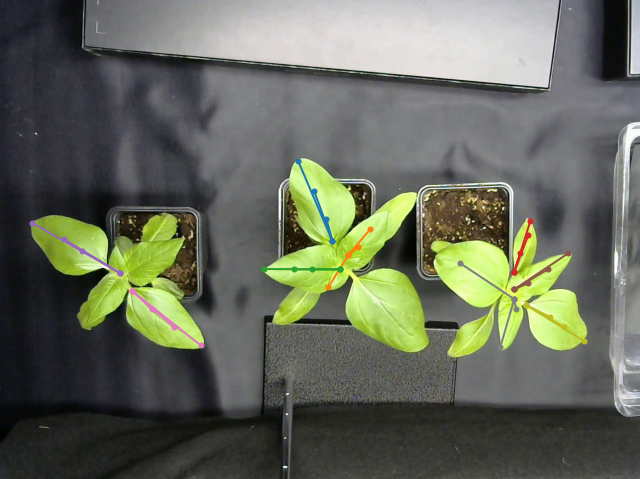

In [25]:
from IPython.display import Image
image_name="labeled_frame.png"
Image(image_name)  # 表示

動画として書き出します。


In [26]:
!{BASE_DIR}/sleap-render {predicted_slp_path}

Saving config: /root/.sleap/1.4.1/preferences.yaml
Writing video with 90 frame images...
INFO:sleap.io.visuals:Chunks: 2, chunk size: 64
Finished 64 frames in 2.7 s, fps = 24, approx 1.1 s remaining
Finished 90 frames in 2.9 s, fps = 31, approx 0.0 s remaining
Done in 3.0022848020000765 s, fps = 29.977169367823922.
Video saved as: data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp.avi


mp4変換して再生します。

In [28]:
%cd /content

movie_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp.avi"
output_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp.avi.mp4"

!ffmpeg -i {movie_path} -b:v 500k -vf "scale='320:trunc(ow/a/2)*2'" {output_path}

/content
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libv

In [29]:
video_data = open(output_path, "rb").read()
video_url = f"data:video/mp4;base64," + b64encode(video_data).decode()
display(HTML(f"""<video width=400 controls><source src="{video_url}" type="{mime_type}">Your browser does not support the video tag.</video>"""))

In [30]:
%%conda_python sleap

import sleap
import numpy as np
import matplotlib.pyplot as plt

# SLEAPの予測結果をロード
predicted_slp_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp"
labels = sleap.load_file(predicted_slp_path)

# プロットの設定
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('tab20')

# 最終フレームの画像を表示（30%の不透明度）
plt.imshow(labels[-1].image, alpha=0.3)

# フレームごとに検出座標を描画
for i, frame in enumerate(labels):
    for n, instance in enumerate(frame.instances):
        # インスタンスの点座標をNumPy配列として取得
        if instance.points is not None:
            # points属性からnumpy配列に変換
            coords = np.array([[point.x, point.y] for point in instance.points if point is not None])

            if coords.size > 0:  # 座標が存在する場合のみプロット
                # 葉ごとに固有の色を指定
                color = cmap(n % 20)  # tab20は20色あるので20で割った余りを使用

                # フレームが進むにつれて不透明度を増加
                alpha = (i + 1) / len(labels)

                # 散布図としてプロット
                plt.scatter(coords[:, 0], coords[:, 1], s=3, color=color, alpha=alpha)

# プロットの体裁を整える
plt.title('Sunflower_track')
plt.axis('off')  # 軸を非表示
plt.tight_layout()

# 画像を保存 - 高解像度で保存
track_filename = 'sunflower_tracking.png'
plt.savefig(track_filename, dpi=300, bbox_inches='tight')
print(f'画像を {track_filename} として保存しました')

# 別の形式でも保存（SVGとして保存 - ベクター形式）
# svg_filename = 'sunflower_tracking.svg'
# plt.savefig(svg_filename, format='svg', bbox_inches='tight')
# print(f'ベクター画像を {svg_filename} として保存しました')

画像を sunflower_tracking.png として保存しました




In [31]:
from IPython.display import Image
track_filename = 'sunflower_tracking.png'
Image(track_filename, height=400)  # 表示

Output hidden; open in https://colab.research.google.com to view.

labelsから取り出すことのできるnumpy arrayは構造化されており、特定のキーポイントは特定のindexに対応します。

例えば特定の葉のみ描画したい場合は

In [32]:
%%conda_python sleap

import sleap
import numpy as np
import matplotlib.pyplot as plt

# SLEAPの予測結果をロード
predicted_slp_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp"
labels = sleap.load_file(predicted_slp_path)

# 可視化したい葉のインデックス（0から始まる）
leaf_index = 0  # ここを変更すると異なる葉を表示できます

# プロットの設定
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('viridis')  # カラーマップをviridisに変更（青〜黄色〜緑のグラデーション）

# 最終フレームの画像を背景として表示（30%の不透明度）
plt.imshow(labels[-1].image, alpha=0.3)

# 葉の動きをプロット
for i, frame in enumerate(labels):
    if len(frame.instances) > leaf_index:
        # 指定された葉のインスタンスを取得
        instance_coord = frame.instances[leaf_index].numpy()

        if instance_coord is not None and len(instance_coord) > 0:
            # 時間経過を不透明度で表現（古い→新しい：透明→不透明）
            alpha = (i + 1) / len(labels)

            # 散布図としてプロット（時間経過を色の変化でも表現）
            color_val = i / len(labels)  # 0〜1の値（時間の進行）
            plt.scatter(instance_coord[:, 0], instance_coord[:, 1],
                       s=3, color=cmap(color_val), alpha=0.7)

# プロットの体裁を整える
plt.title(f'Sunflower Tracking for Leaf #{leaf_index}')
plt.axis('off')  # 軸を非表示
plt.tight_layout()

# カラーバーを追加（時間経過の指標）
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, len(labels)-1))
sm._A = []  # ダミーデータ
cbar = plt.colorbar(sm)
cbar.set_label('Frame (Time)')

# 画像を保存
track_filename = f'sunflower_tracking_leaf_{leaf_index}.png'
plt.savefig(track_filename, dpi=300, bbox_inches='tight')
print(f'画像を {track_filename} として保存しました')

# データセット情報を表示
print(f"データセット情報:")
print(f"総フレーム数: {len(labels)}")
print(f"トラック数: {len(labels.tracks) if hasattr(labels, 'tracks') else '不明'}")
print(f"追跡中の葉のインデックス: {leaf_index}")
print(f"検出されたインスタンス数（最終フレーム）: {len(labels[-1].instances)}")

画像を sunflower_tracking_leaf_0.png として保存しました
データセット情報:
総フレーム数: 90
トラック数: 0
追跡中の葉のインデックス: 0
検出されたインスタンス数（最終フレーム）: 9




In [33]:
from IPython.display import Image
leaf_index = 0
track_filename = f'sunflower_tracking_leaf_{leaf_index}.png'
Image(track_filename, height=500)  # 表示

Output hidden; open in https://colab.research.google.com to view.

特定のキーポイントのみ描画したい場合は

In [34]:
%%conda_python sleap

import sleap
import numpy as np
import matplotlib.pyplot as plt

# SLEAPの予測結果をロード
predicted_slp_path = "data/SLEAP_plant_tracking/SLEAPTrackingData/movies/SunflowersTopView.predictions.slp"
labels = sleap.load_file(predicted_slp_path)

# プロットの設定
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('tab20')

plt.imshow(labels[-1].image, alpha=0.3)

for i, frame in enumerate(labels):
    instance_coords = [x.numpy() for x in frame.instances]
    instance_coord = instance_coords[0]
    coord = instance_coord[-1]
    plt.scatter(coord[0], coord[1], s=3, color=cmap(0), alpha=i/len(labels))

# プロットの体裁を整える
plt.title('Sunflower Tracking for Leaf')
plt.axis('off')  # 軸を非表示
plt.tight_layout()

# 画像を保存
track_filename = f'sunflower_tracking_leaf_for_specific_keypoint.png'
plt.savefig(track_filename, dpi=300, bbox_inches='tight')
print(f'画像を {track_filename} として保存しました')

画像を sunflower_tracking_leaf_for_specific_keypoint.png として保存しました




In [35]:
from IPython.display import Image
track_filename = f'sunflower_tracking_leaf_for_specific_keypoint.png'
Image(track_filename, height=400)  # 表示

Output hidden; open in https://colab.research.google.com to view.

## 最後に
ここまでノートブックをたどってきた人であれば、numpy arrayから（例えばpandasのデータフレームを経由して）csvファイルに座標をエクスポートするなど容易でしょう。
植物ではまだ動態解析の事例については限定的ですが、動物分野における知見が積極的に活用されはじめています。自身のデータで解析をぜひ行ってみましょう。